In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the datasets
train_df = pd.read_csv('C:/Users/thesh/Downloads/archive (2) 3/Training Dataset.csv')
test_df = pd.read_csv('C:/Users/thesh/Downloads/archive (2) 3/Test Dataset.csv')
sample_submission_df = pd.read_csv('C:/Users/thesh/Downloads/archive (2) 3/Sample_Submission.csv')

# Display the first few rows of the training dataset
train_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Exploration

In [9]:
# Check for missing values in the training dataset
print(train_df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [10]:
# Summary statistics
print(train_df.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [11]:
# Data types
print(train_df.dtypes)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


 Data Preprocessing
Fill Missing Values

In [12]:
# Fill missing values in the training dataset
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median(), inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

In [13]:
# Fill missing values in the test dataset
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].median(), inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)

Encode Categorical Variables

In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoder = LabelEncoder()
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for feature in categorical_features:
    train_df[feature] = label_encoder.fit_transform(train_df[feature])
    test_df[feature] = label_encoder.transform(test_df[feature])


Scale Numerical Features

In [15]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
scaler = StandardScaler()
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])


Feature Selection and Splitting the Data

In [16]:
# Split the training data into features and target
X_train = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y_train = train_df['Loan_Status'].map({'Y': 1, 'N': 0})  # Convert target to binary

# Features of the test data
X_test = test_df.drop(['Loan_ID'], axis=1)


Model Building and Training

will use a RandomForestClassifier for the initial model.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the training set to evaluate the model
y_train_pred = model.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_train_pred)
print(f'Accuracy on training set: {accuracy}')
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_train_pred))
print('Classification Report:')
print(classification_report(y_train, y_train_pred))


Accuracy on training set: 1.0
Confusion Matrix:
[[192   0]
 [  0 422]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



Model Evaluation and Visualization

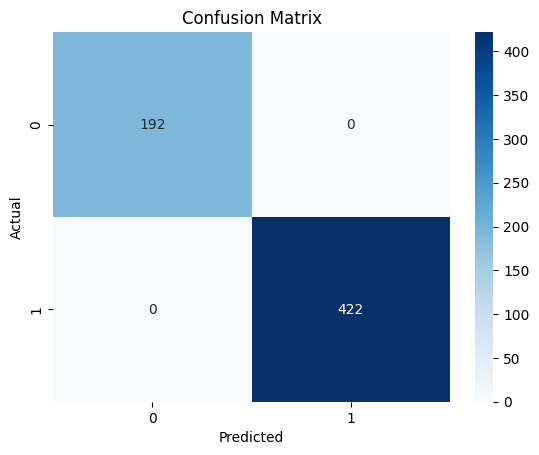

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Make Predictions on Test Data and Prepare 

In [19]:
# Make predictions on the test data
test_predictions = model.predict(X_test)

# Prepare submission DataFrame
submission = pd.DataFrame({
    'Loan_ID': test_df['Loan_ID'],
    'Loan_Status': test_predictions
})

# Map numerical predictions back to 'Y' and 'N'
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save to CSV
submission.to_csv('loan_approval_predictions.csv', index=False)


Visualizations to Make It Understandable to a 5-Year-Old

Visualizing Income and Loan Amount

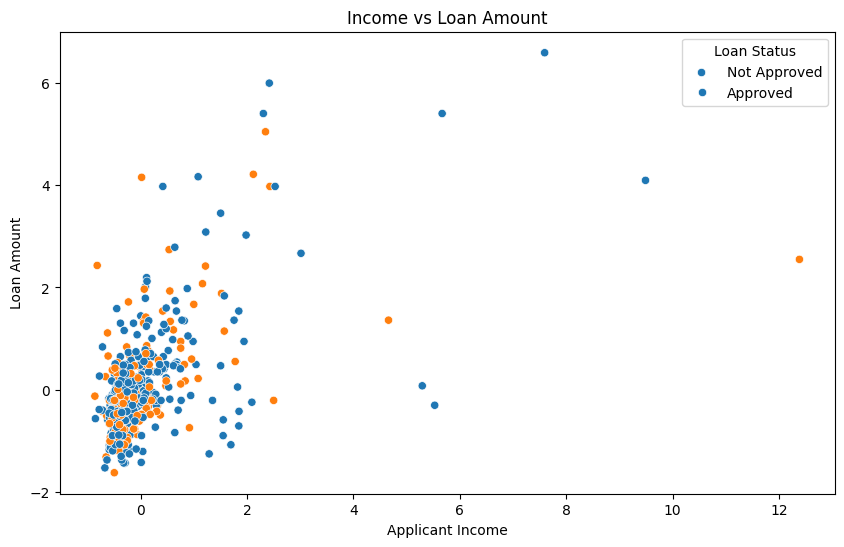

In [20]:
# Plot income vs loan amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=train_df)
plt.title('Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status', labels=['Not Approved', 'Approved'])
plt.show()


Visualizing Loan Approval Distribution

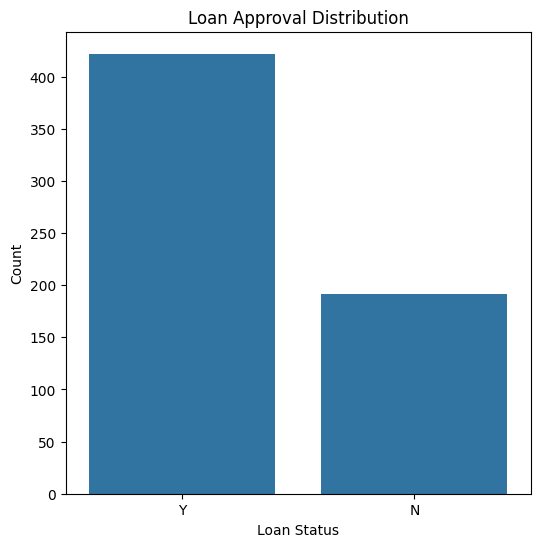

In [21]:
# Plot count of loan approvals
plt.figure(figsize=(6, 6))
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


Cross-Validation and Model Tuning

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Evaluate models using cross-validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Random Forest Cross-Validation Accuracy: {rf_scores.mean()}')
print(f'Logistic Regression Cross-Validation Accuracy: {lr_scores.mean()}')
print(f'XGBoost Cross-Validation Accuracy: {xgb_scores.mean()}')


Random Forest Cross-Validation Accuracy: 0.7850459816073571
Logistic Regression Cross-Validation Accuracy: 0.8045715047314408
XGBoost Cross-Validation Accuracy: 0.7752499000399841


Model Selection and Final Training

In [25]:
# Train the final model on the entire training set
final_model = xgb_model.fit(X_train, y_train)

# Make predictions on the test data
test_predictions = final_model.predict(X_test)

# Prepare submission DataFrame
submission = pd.DataFrame({
    'Loan_ID': test_df['Loan_ID'],
    'Loan_Status': test_predictions
})

# Map numerical predictions back to 'Y' and 'N'
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

# Save to CSV
submission.to_csv('loan_approval_predictions.csv', index=False)


Distribution of Numerical Features

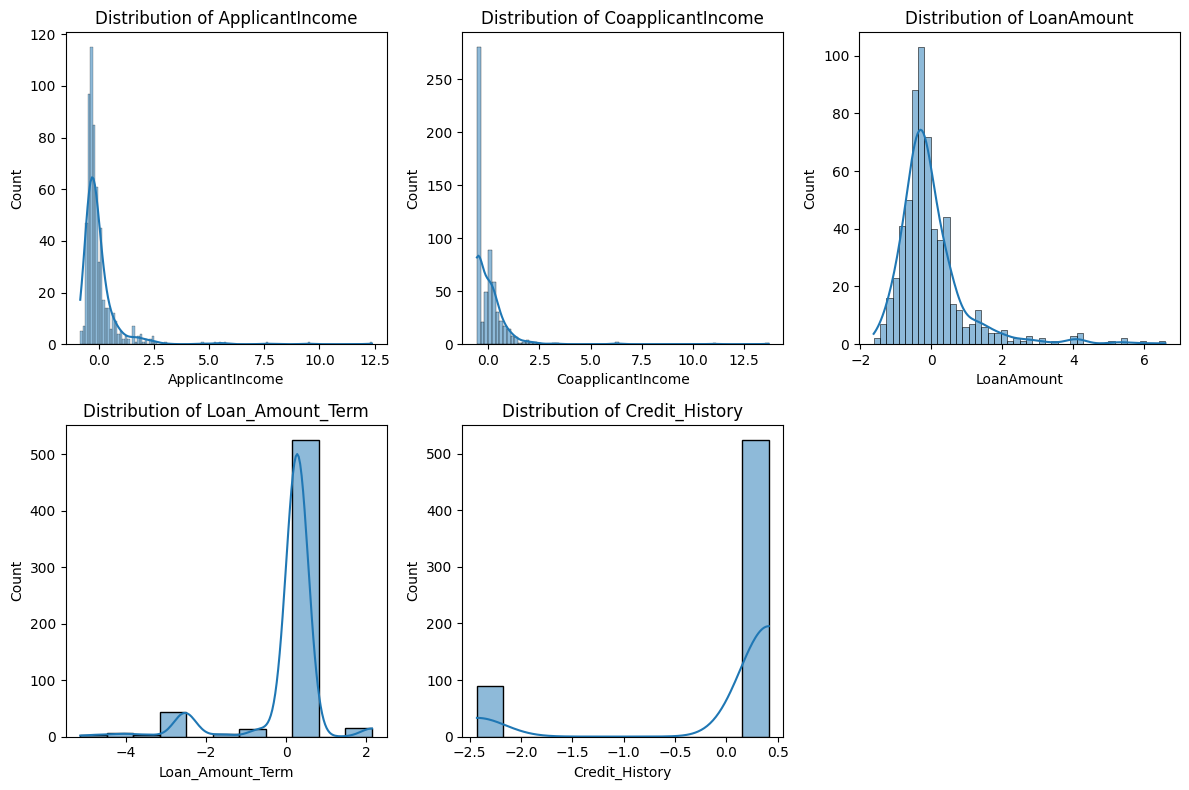

In [26]:
# Plot distribution of numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Relationship Between Categorical Features and Loan Status

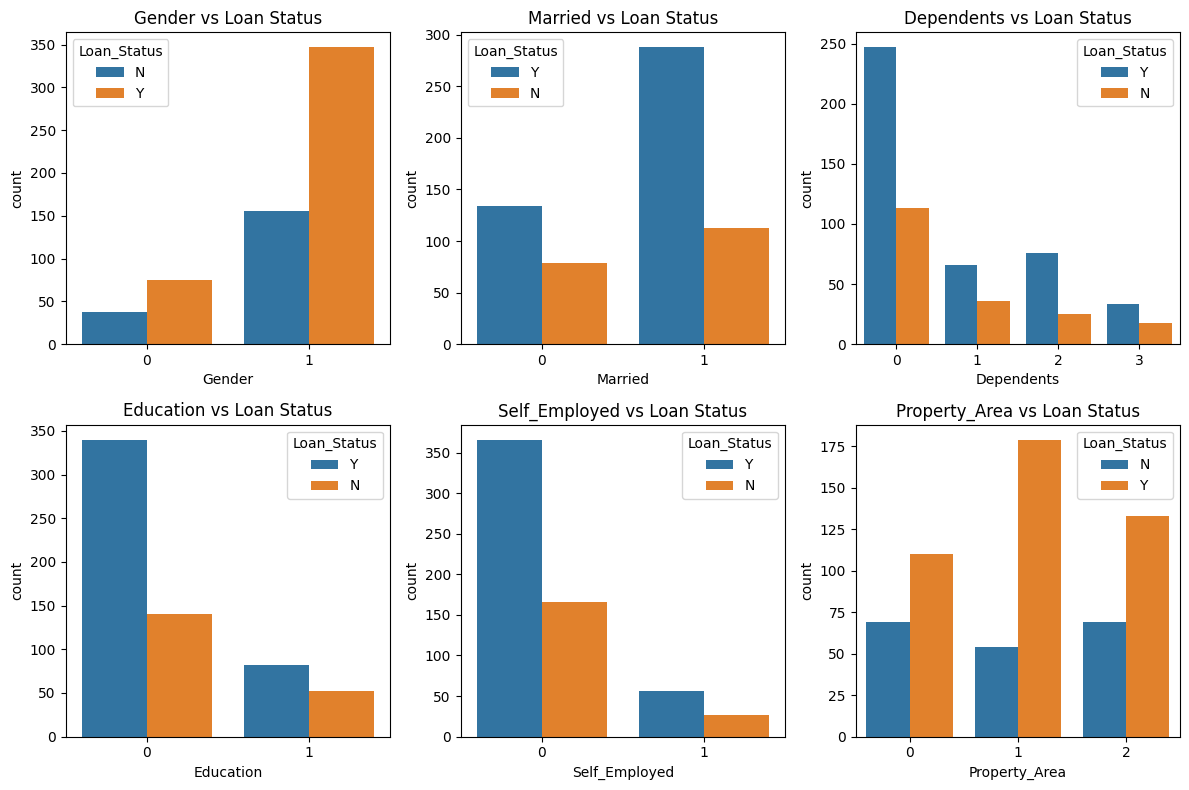

In [27]:
# Plot relationship between categorical features and loan status
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='Loan_Status', data=train_df)
    plt.title(f'{col} vs Loan Status')
plt.tight_layout()
plt.show()


In [28]:
# Split the training data into features and target
X_train = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y_train = train_df['Loan_Status'].map({'Y': 1, 'N': 0})  # Convert target to binary


In [29]:
# Features of the test data
X_test = test_df.drop(['Loan_ID'], axis=1)

In [30]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000, random_state=42)
xgb_model = XGBClassifier(random_state=42)

In [31]:
# Evaluate models using cross-validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Random Forest Cross-Validation Accuracy: {rf_scores.mean()}')
print(f'Logistic Regression Cross-Validation Accuracy: {lr_scores.mean()}')
print(f'XGBoost Cross-Validation Accuracy: {xgb_scores.mean()}')


Random Forest Cross-Validation Accuracy: 0.7850459816073571
Logistic Regression Cross-Validation Accuracy: 0.8045715047314408
XGBoost Cross-Validation Accuracy: 0.7752499000399841


In [32]:
# Train the final model on the entire training set (assuming XGBoost performs best)
final_model = xgb_model.fit(X_train, y_train)

In [33]:
# Make predictions on the test data
test_predictions = final_model.predict(X_test)


In [34]:
# Prepare submission DataFrame
submission = pd.DataFrame({
    'Loan_ID': test_df['Loan_ID'],
    'Loan_Status': test_predictions
})

In [35]:
# Map numerical predictions back to 'Y' and 'N'
submission['Loan_Status'] = submission['Loan_Status'].map({1: 'Y', 0: 'N'})

In [36]:
# Save to CSV
submission.to_csv('loan_approval_predictions.csv', index=False)


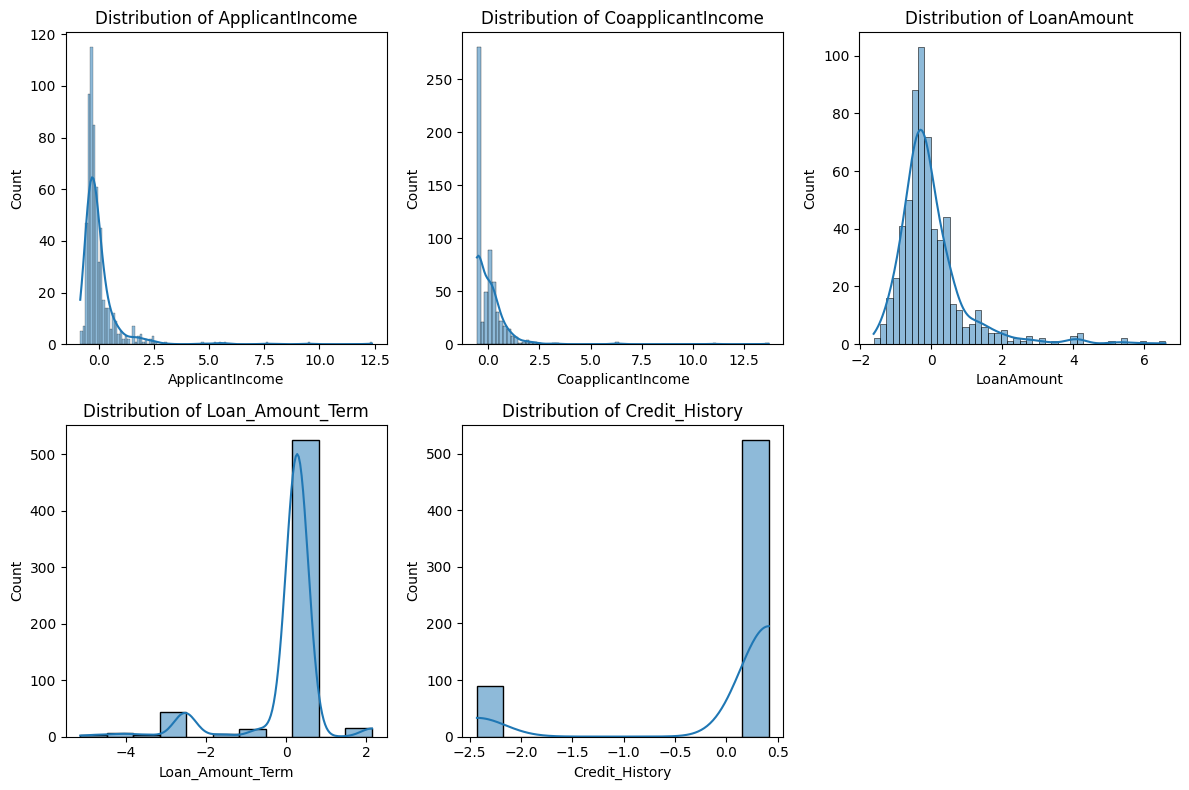

In [37]:
# Visualizations
# Distribution of numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


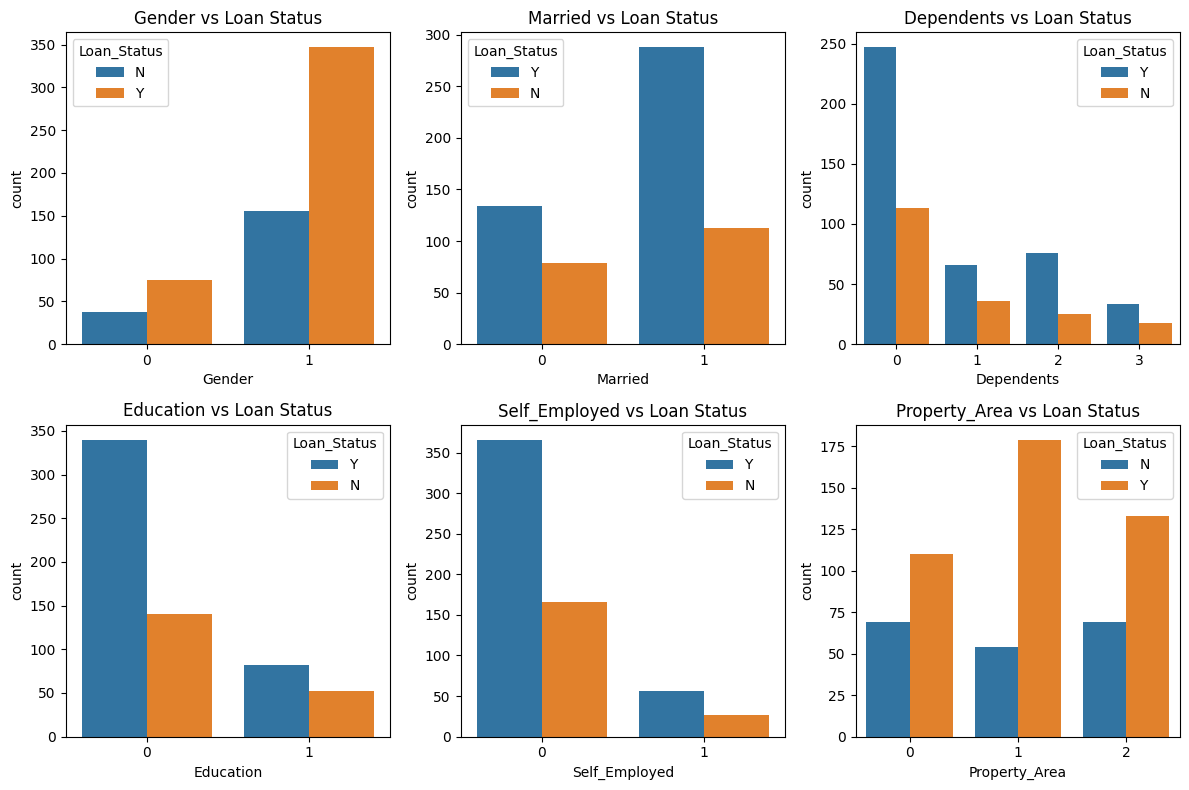

In [38]:
# Relationship between categorical features and loan status
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='Loan_Status', data=train_df)
    plt.title(f'{col} vs Loan Status')
plt.tight_layout()
plt.show()

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict on the training data
train_predictions = final_model.predict(X_train)

# Calculate accuracy and precision
accuracy = accuracy_score(y_train, train_predictions)
precision = precision_score(y_train, train_predictions)
recall = recall_score(y_train, train_predictions)
f1 = f1_score(y_train, train_predictions)
conf_matrix = confusion_matrix(y_train, train_predictions)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_train, train_predictions))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[192   0]
 [  0 422]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

